In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("twitter_training.csv")

In [ ]:
train = train.iloc[:, 2:]
train.columns = ['label', 'data']

In [ ]:
train.head()

,label,data
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


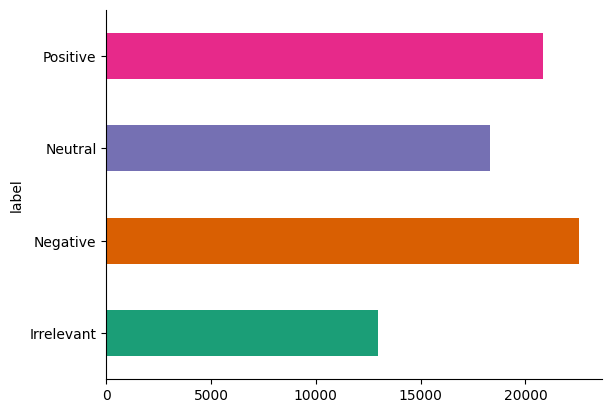

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train.label.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [ ]:
train.isna().sum()

label      0
data     686
dtype: int64

In [ ]:
train = train.dropna()

In [ ]:
train.label.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

<Axes: xlabel='label'>

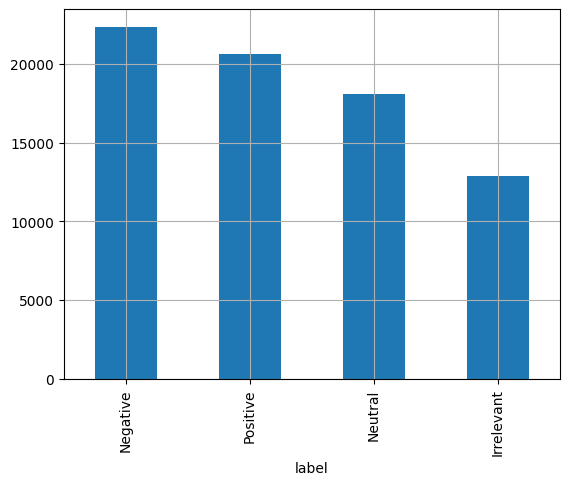

In [ ]:
train.label.value_counts().plot(kind = 'bar', grid = True)

In [ ]:
y = train["label"]
X = train["data"]

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Padding
max_len = 100  # Define the maximum sequence length
X = pad_sequences(X, maxlen=max_len,padding="post")

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=4)

In [ ]:
X[1].shape

(100,)

In [ ]:
print(X.shape)
print(y.shape)

(73995, 100)
(73995, 4)


In [ ]:
# Define the model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))

# Bidirectional LSTM layers
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))

# Dropout for regularization
model.add(Dropout(0.5))

# BatchNormalization for stabilizing training
model.add(BatchNormalization())

# Dense layer with softmax activation for classification
model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                        

In [ ]:
history = model.fit(X, y, epochs=20, batch_size=128, callbacks=[reduce_lr])

Epoch 1/20
579/579 [==============================] - ETA: 0s - loss: 0.6495 - accuracy: 0.7543

579/579 [==============================] - 888s 2s/step - loss: 0.6495 - accuracy: 0.7543 - lr: 0.0010
Epoch 2/20
579/579 [==============================] - ETA: 0s - loss: 0.4262 - accuracy: 0.8407

579/579 [==============================] - 849s 1s/step - loss: 0.4262 - accuracy: 0.8407 - lr: 0.0010
Epoch 3/20
579/579 [==============================] - ETA: 0s - loss: 0.3362 - accuracy: 0.8750

579/579 [==============================] - 854s 1s/step - loss: 0.3362 - accuracy: 0.8750 - lr: 0.0010
Epoch 4/20
579/579 [==============================] - ETA: 0s - loss: 0.2882 - accuracy: 0.8916

579/579 [==============================] - 872s 2s/step - loss: 0.2882 - accuracy: 0.8916 - lr: 0.0010
Epoch 5/20
579/579 [==============================] - ETA: 0s - loss: 0.2528 - accuracy: 0.9060

579/579 [==============================] - 904s 2s/step - loss: 0.2528 - accuracy: 0.9060 - lr: 0.0010
Epoch 6/20
579/579 [==============================] - ETA: 0s - loss: 0.2282 - accuracy: 0.9146

579/579 [==============================] - 895s 2s/step - loss: 0.2282 - accuracy: 0.9146 - lr: 0.0010
Epoch 7/20
579/579 [==============================] - ETA: 0s - loss: 0.2165 - accuracy: 0.9189

579/579 [==============================] - 848s 1s/step - loss: 0.2165 - accuracy: 0.9189 - lr: 0.0010
Epoch 8/20
579/579 [==============================] - ETA: 0s - loss: 0.1963 - accuracy: 0.9262

579/579 [==============================] - 860s 1s/step - loss: 0.1963 - accuracy: 0.9262 - lr: 0.0010
Epoch 9/20
579/579 [==============================] - ETA: 0s - loss: 0.1829 - accuracy: 0.9299

579/579 [==============================] - 861s 1s/step - loss: 0.1829 - accuracy: 0.9299 - lr: 0.0010
Epoch 10/20
579/579 [==============================] - ETA: 0s - loss: 0.1744 - accuracy: 0.9332

579/579 [==============================] - 860s 1s/step - loss: 0.1744 - accuracy: 0.9332 - lr: 0.0010
Epoch 11/20
579/579 [==============================] - ETA: 0s - loss: 0.1675 - accuracy: 0.9362

579/579 [==============================] - 903s 2s/step - loss: 0.1675 - accuracy: 0.9362 - lr: 0.0010
Epoch 12/20
579/579 [==============================] - ETA: 0s - loss: 0.1556 - accuracy: 0.9411

579/579 [==============================] - 871s 2s/step - loss: 0.1556 - accuracy: 0.9411 - lr: 0.0010
Epoch 13/20
579/579 [==============================] - ETA: 0s - loss: 0.1509 - accuracy: 0.9418

579/579 [==============================] - 870s 2s/step - loss: 0.1509 - accuracy: 0.9418 - lr: 0.0010
Epoch 14/20
579/579 [==============================] - ETA: 0s - loss: 0.1423 - accuracy: 0.9450

579/579 [==============================] - 867s 1s/step - loss: 0.1423 - accuracy: 0.9450 - lr: 0.0010
Epoch 15/20
579/579 [==============================] - ETA: 0s - loss: 0.1395 - accuracy: 0.9464

579/579 [==============================] - 860s 1s/step - loss: 0.1395 - accuracy: 0.9464 - lr: 0.0010
Epoch 16/20
579/579 [==============================] - ETA: 0s - loss: 0.1312 - accuracy: 0.9491

579/579 [==============================] - 856s 1s/step - loss: 0.1312 - accuracy: 0.9491 - lr: 0.0010
Epoch 17/20
579/579 [==============================] - ETA: 0s - loss: 0.1291 - accuracy: 0.9501

579/579 [==============================] - 859s 1s/step - loss: 0.1291 - accuracy: 0.9501 - lr: 0.0010
Epoch 18/20
579/579 [==============================] - ETA: 0s - loss: 0.1226 - accuracy: 0.9516

579/579 [==============================] - 859s 1s/step - loss: 0.1226 - accuracy: 0.9516 - lr: 0.0010
Epoch 19/20
579/579 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9531

579/579 [==============================] - 856s 1s/step - loss: 0.1197 - accuracy: 0.9531 - lr: 0.0010
Epoch 20/20
579/579 [==============================] - ETA: 0s - loss: 0.1169 - accuracy: 0.9538

579/579 [==============================] - 857s 1s/step - loss: 0.1169 - accuracy: 0.9538 - lr: 0.0010


In [ ]:
model.save("sentiment_analysis_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
for i in range(12):
    input_sequence = X[i].reshape(1, -1)
    print("---------------------------------")
    print(np.argmax(y[i]))
    print(np.argmax(model.predict(input_sequence, verbose=0)))

---------------------------------
3
3
---------------------------------
3
3
---------------------------------
3
3
---------------------------------
3
3
---------------------------------
3
3
---------------------------------
3
3
---------------------------------
3
3
---------------------------------
3
3
---------------------------------
3
3
---------------------------------
3
3
---------------------------------
3
3
---------------------------------
2
2
